# Visualizando Dados com Pandas

Embora não seja muito usual, é possível plotar gráficos utilizando a própria biblioteca Pandas. Essa plotagem é útil quando precisa ter uma visualização rápida quando está fazendo a análise dos dados. 

Nesse *notebook* foram utilizados dados da variação do dólar em relação aos reais. O índice será colocado como a coluna *date*, já que todas as colunas estão relacionadas a uma data. Além disso a coluna *date* será transformada do formato de *string* para o de *datetime*.

In [1]:
#Importar pandas
import pandas as pd

In [2]:
#Importar arquivo csv para o Pandas
df = pd.read_csv('/home/renata/Desktop/Cursos/Data-Science-na-Pratica/Datasets/BRL=X.csv')
df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)

In [3]:
#Primeiras entradas
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,2.946,2.946,2.923,2.923,2.923,0.0
2003-12-02,2.923,2.931,2.923,2.931,2.931,0.0
2003-12-03,2.931,2.936,2.926,2.931,2.931,0.0
2003-12-04,2.931,2.943,2.931,2.943,2.943,0.0
2003-12-05,2.943,2.948,2.934,2.934,2.934,0.0


## Gráfico de Linhas

Gráfico de linhas exibe informações com uma série de pontos (marcadores) ligados por segmentos de linha reta. É recomendado ser utilizado em construções temporais. Pode ser exibida uma ou mais séries em um mesmo gráfico.

Gráficos de linhas mostram tendências ou alterações ao longo do tempo.

<AxesSubplot:xlabel='Date'>

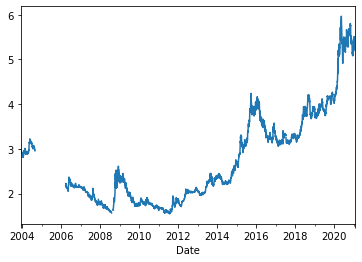

In [4]:
df.High.plot()

Com a plotagem percebe-se que há um aumento progressivo no valor do dólar em relação ao real, ou seja, há uma desvalorização do nosso dinheiro perante o mercado internacional.

## Histograma

Histograma, também conhecido como gráfico de distribuição de frequências, é uma representação gráfica da distribuição de dados numéricos, ou seja, exibe a frequência de ocorrência de uma determinada amostra. É útil para saber quantas vezes uma determinada informação aparece no conjunto de dados. 

<AxesSubplot:>

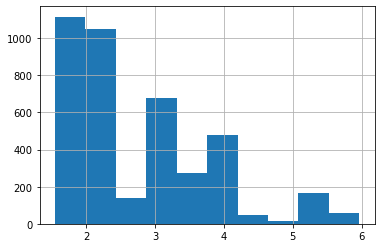

In [5]:
df.High.hist()

## Gráfico de Dispersão (Scatter Plot)

É excelente e ideal para ver a correlação (o quanto uma variável depende da outra) entre duas variáveis quaisquer. 

Além de ser útil para saber o quanto uma variável depende da outra também é para plotar coordenadas geograficas.

Não faz sentido esse tipo de gráfico utilizando os dados da bolsa, portanto será utilizado outro conjunto de dados, dados sobre o consumo de cerveja em uma região universitária da cidade de São Paulo. 

[Clique aqui](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo) para mais informações sobre esse conjunto de dados.

#### Limpeza dos Dados antes da utilização

Os dados brutos tiveram a necessidade de sofrerem uma limpeza para gerar a correta visualização.

In [8]:
#Importar dados orignais de consumo de cerveja
df_cerveja_original = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/consumo_cerveja_original.csv')
df_cerveja_original.dropna(inplace=True)

#Trocar nomes das colunas 
df_cerveja_original.columns = ['data', 'media', 'minima', 'maxima', 'precipitacao', 'fds', 'consumo']

df_cerveja_original.media = df_cerveja_original.media.apply(lambda x: float(x.replace(',', '.')))
df_cerveja_original.minima = df_cerveja_original.minima.apply(lambda x: float(x.replace(',', '.')))
df_cerveja_original.maxima = df_cerveja_original.maxima.apply(lambda x: float(x.replace(',', '.')))
df_cerveja_original.precipitacao = df_cerveja_original.precipitacao.apply(lambda x: float(x.replace(',', '.')))

#Exportar para csv
df_cerveja_original.to_csv('consumo_cerveja.csv', index = False)

In [9]:
#Importar dados de consum de cerveja
df_cerveja = pd.read_csv('/home/renata/Desktop/Cursos/Data-Science-na-Pratica/Datasets/consumo_cerveja.csv')

#Ver 5 primeiras entradas
df_cerveja.head()

,data,media,minima,maxima,precipitacao,fds,consumo
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


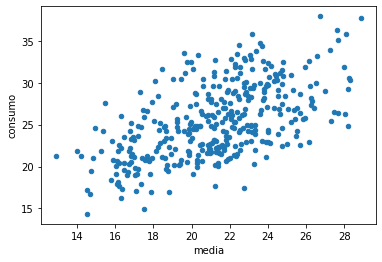

In [10]:
#Plotar gráfico de dispersão
df_cerveja.plot.scatter('media', 'consumo');

## Boxplot

É um gráfico utilizado para avaliar a distribuição dos dados. Ele é formado pelo primeiro e terceiro quartil e pela mediana, assim como os valores máximos e mínimos. Os circulos que porventura possam aparecer ao plotar os gráficos são os *outliers*, são valores que distorcem a realidade do que está sendo tratado. 

Esse gráfico é um dos que mais conseguem transmitir informações estátisticas de uma só vez. 

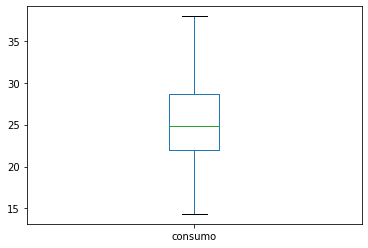

In [11]:
#Plotar boxplot para valores máximos de consumo de cerveja
df_cerveja.consumo.plot(kind = 'box');

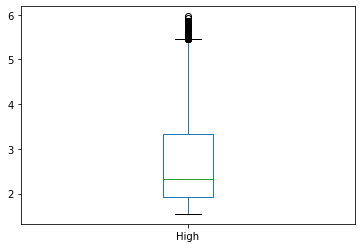

In [12]:
#Boxplot para os valores máximos de ação
df.High.plot(kind = 'box');

## Conclusão

Percebe-se que é possível gerar diversos tipos de gráficos de forma simples ao utilizar a biblioteca Pandas, essa fácil visualização facilita quando precisa ter uma informação visual mas não muito elaborada, apenas para tirar alguns *insights*.